In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA on Test Data

In [2]:
test_data = pd.read_csv("./titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test_data.shape

(418, 11)

In [4]:
#data types

test_data.info()

<class 'pandas.core.frame.DataFrame'>RangeIndex: 418 entries, 0 to 417Data columns (total 11 columns): #   Column       Non-Null Count  Dtype  ---  ------       --------------  -----   0   PassengerId  418 non-null    int64   1   Pclass       418 non-null    int64   2   Name         418 non-null    object  3   Sex          418 non-null    object  4   Age          332 non-null    float64 5   SibSp        418 non-null    int64   6   Parch        418 non-null    int64   7   Ticket       418 non-null    object  8   Fare         417 non-null    float64 9   Cabin        91 non-null     object  10  Embarked     418 non-null    object dtypes: float64(2), int64(4), object(5)memory usage: 36.1+ KB

In [5]:
# missing values

test_data.isnull().sum()

PassengerId      0Pclass           0Name             0Sex              0Age             86SibSp            0Parch            0Ticket           0Fare             1Cabin          327Embarked         0dtype: int64

In [6]:
# stats of data

test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 1. Data Exploration

### Load Dataset

In [8]:
train_data = pd.read_csv("./titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Inspect the Structure of Data

In [9]:
train_data.shape

(891, 12)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>RangeIndex: 891 entries, 0 to 890Data columns (total 12 columns): #   Column       Non-Null Count  Dtype  ---  ------       --------------  -----   0   PassengerId  891 non-null    int64   1   Survived     891 non-null    int64   2   Pclass       891 non-null    int64   3   Name         891 non-null    object  4   Sex          891 non-null    object  5   Age          714 non-null    float64 6   SibSp        891 non-null    int64   7   Parch        891 non-null    int64   8   Ticket       891 non-null    object  9   Fare         891 non-null    float64 10  Cabin        204 non-null    object  11  Embarked     889 non-null    object dtypes: float64(2), int64(5), object(5)memory usage: 83.7+ KB

In [11]:
train_data.isna().sum()

PassengerId      0Survived         0Pclass           0Name             0Sex              0Age            177SibSp            0Parch            0Ticket           0Fare             0Cabin          687Embarked         2dtype: int64

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### *check the duplicates*

In [13]:
duplicates = train_data[train_data.duplicated()]
print(duplicates)

Empty DataFrameColumns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]Index: []

#### *drop irrelevant columns*

In [14]:
train_data.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

In [15]:
train_data.shape

(891, 8)

### Features Distributions

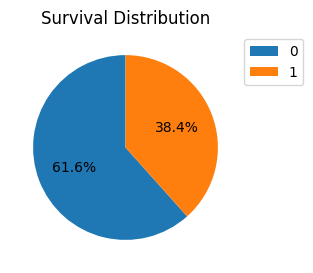

In [16]:
survival_counts = train_data['Survived'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(survival_counts, autopct='%1.1f%%', startangle=90)
plt.legend(labels=survival_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Survival Distribution')
plt.show()

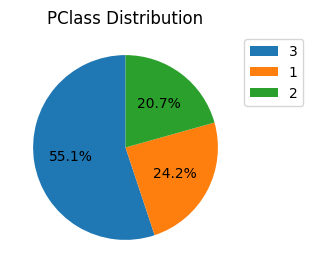

In [17]:
pclass_counts = train_data['Pclass'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(pclass_counts, autopct='%1.1f%%', startangle=90)
plt.legend(labels=pclass_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('PClass Distribution')
plt.show()

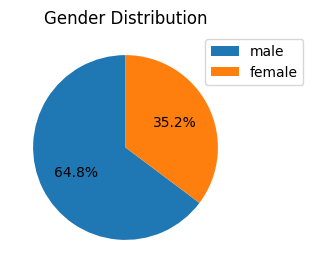

In [18]:
gender_counts = train_data['Sex'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(gender_counts, autopct='%1.1f%%', startangle=90)
plt.legend(labels=gender_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Gender Distribution')
plt.show()

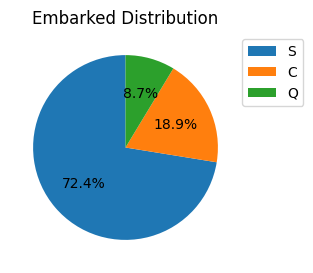

In [19]:
emb_counts = train_data['Embarked'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(emb_counts, autopct='%1.1f%%', startangle=90)
plt.legend(labels=emb_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Embarked Distribution')
plt.show()

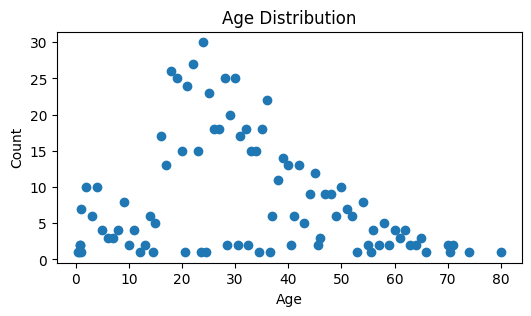

In [20]:
age_counts = train_data['Age'].value_counts()

plt.figure(figsize=(6, 3))
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# 2. Data Cleaning & Preprocessing

#### *fill the missing values with 2 methods*

In [21]:
#1.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

#2.
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [22]:
train_data.isna().sum()

Survived    0Pclass      0Sex         0Age         0SibSp       0Parch       0Fare        0Embarked    0dtype: int64

#### *encoding features*

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#initialize the encoder
label_encoder = LabelEncoder()

#encode the col
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

In [25]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


#### *feature engineering(column merge)*

In [26]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']

In [27]:
train_data.drop(columns=['SibSp', 'Parch'], inplace=True)

In [28]:
train_data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1


# 3. EDA

### Heatmap

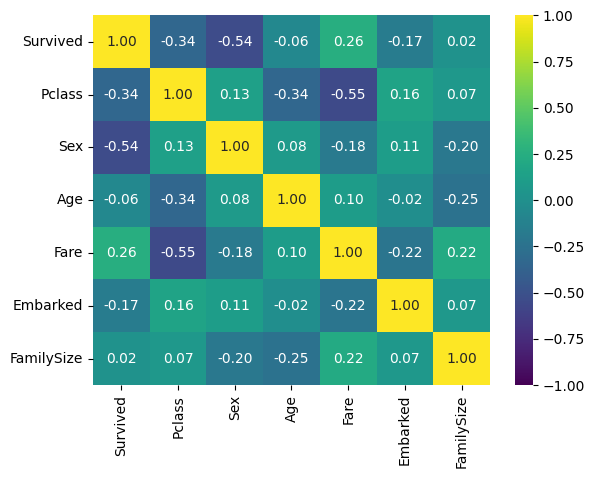

In [29]:
sns.heatmap(train_data.corr(numeric_only=True), cmap='viridis', annot=True, fmt='.2f', vmin= -1, vmax=1)
plt.show()

### Correlation Matrix`

In [30]:
#identify numeric col
numeric_col = train_data.select_dtypes(include=[int, float]).columns

#compute correlation matrix
corr_matrix = train_data[numeric_col].corr()

print(corr_matrix)

            Survived    Pclass       Sex       Age      Fare  Embarked  \Survived    1.000000 -0.338481 -0.543351 -0.064910  0.257307 -0.167675   Pclass     -0.338481  1.000000  0.131900 -0.339898 -0.549500  0.162098   Sex        -0.543351  0.131900  1.000000  0.081163 -0.182333  0.108262   Age        -0.064910 -0.339898  0.081163  1.000000  0.096688 -0.018754   Fare        0.257307 -0.549500 -0.182333  0.096688  1.000000 -0.224719   Embarked   -0.167675  0.162098  0.108262 -0.018754 -0.224719  1.000000   FamilySize  0.016639  0.065997 -0.200988 -0.245619  0.217138  0.066516               FamilySize  Survived      0.016639  Pclass        0.065997  Sex          -0.200988  Age          -0.245619  Fare          0.217138  Embarked      0.066516  FamilySize    1.000000  

### Survival Rate by Gender

#### *how many males & females on titanic*

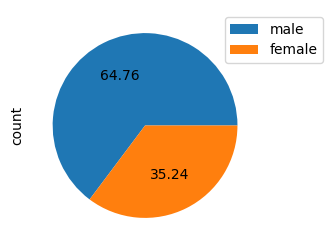

In [31]:
plt.figure(figsize=(3,3))
train_data['Sex'].value_counts().plot(kind= 'pie', autopct='%.2f', labels=None)
plt.legend(gender_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

#### *women rate to survive*

In [32]:
women = train_data[train_data['Sex']== 0]['Survived']
women
survival_rate_women = (sum(women)*100) / len(women)
print(f"Survival rate of women is: {survival_rate_women:.2f}%")

Survival rate of women is: 74.20%

#### *men rate to survive*

In [33]:
men = train_data[train_data['Sex']== 1]['Survived']
survival_rate_men = (sum(men))*100 / len(men)
print(f"Survival rate of women is: {survival_rate_men:.2f}%")

Survival rate of women is: 18.89%

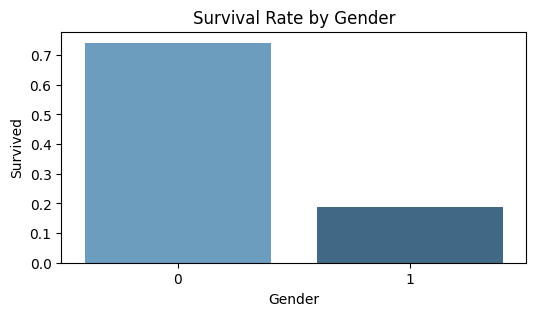

In [34]:
sur_rate_gender = train_data.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(6,3))
sns.barplot(x=sur_rate_gender.index, y=sur_rate_gender.values, palette="Blues_d")
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.title('Survival Rate by Gender')
plt.show()

### Survival Rate by Age

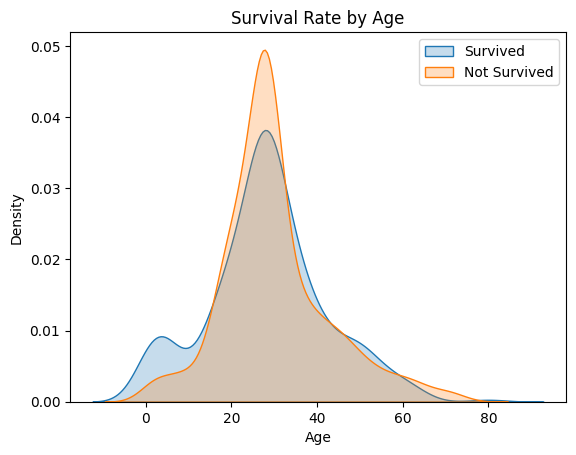

In [35]:
sns.kdeplot(train_data['Age'][train_data['Survived']== 1], label='Survived', shade=True)
sns.kdeplot(train_data['Age'][train_data['Survived']== 0], label='Not Survived', shade=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

### Survival Rate by Class

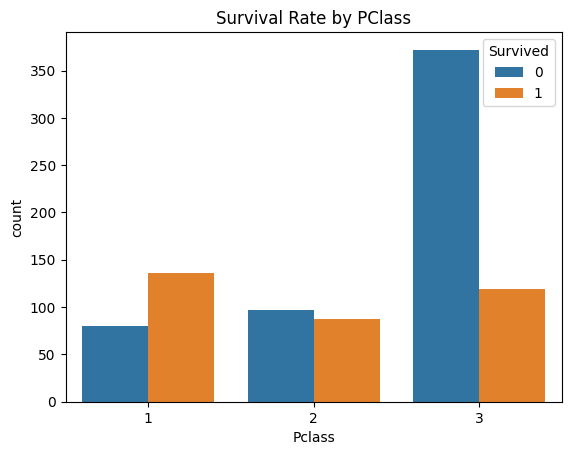

In [36]:
pclass_count= train_data['Pclass'].value_counts()
sur_count= train_data['Survived'].value_counts()

sns.countplot(x='Pclass', data=train_data, hue= 'Survived')
plt.title('Survival Rate by PClass')
plt.legend(sur_count.index, title='Survived')
plt.show()

### Survival Count by Family Size

In [37]:
train_data['FamilySize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

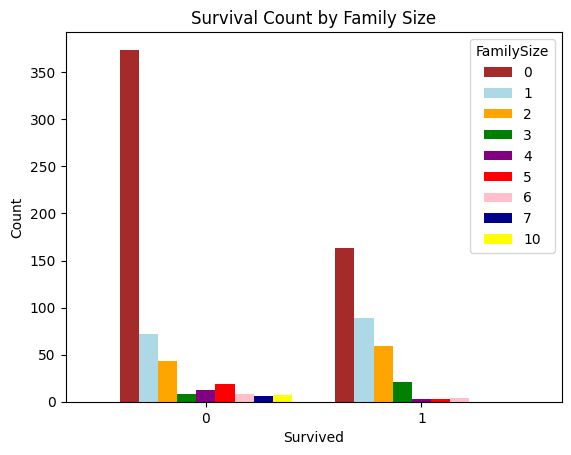

In [38]:
sur_by_fam_size= train_data.groupby(['Survived', 'FamilySize']).size().unstack()

sur_by_fam_size.plot(kind='bar', color=[ 'brown', 'lightblue', 'orange', 'green', 'purple', 'red', 'pink', 'darkblue', 'yellow'], width=0.8)
plt.title('Survival Count by Family Size')
plt.xlabel('Survived')
plt.ylabel('Count')
# plt.legend(labels=[str(i) for i in range(9)])
plt.xticks(rotation=0)
plt.show()

### Survival Rate by Embarked

In [39]:
train_data['Embarked'].unique()

array([2, 0, 1])

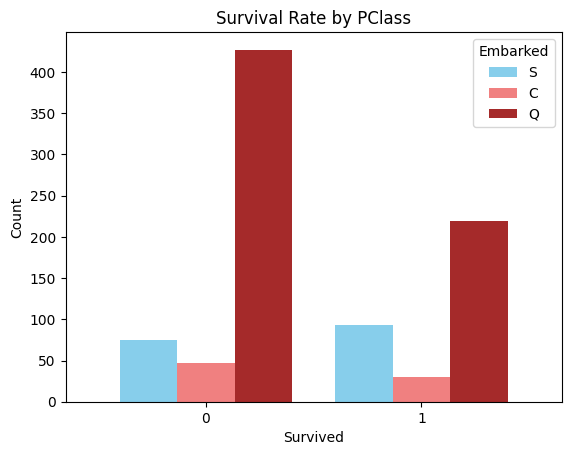

In [40]:
emb_count= train_data.groupby(['Survived', 'Embarked']).size().unstack()

emb_count.plot(kind= 'bar', color=['skyblue', 'lightcoral', 'brown'], width=0.8)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Rate by PClass')
plt.legend(labels=["S", "C", "Q"], title='Embarked')
plt.xticks(rotation=0)
plt.show()

### Patterns for Prediction of Survival

#### *prepae feature and target variable*

In [41]:
test_data= test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

y= train_data['Survived']
X= train_data.drop('Survived', axis=1)

X_test = test_data

#### *models prediction*

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [76]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the training and test data
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)

    # Calculate and print accuracy for both training and test data
    train_accu = accuracy_score(y_train, train_prediction)
    test_accu = accuracy_score(y_test, test_prediction)

    print(f"{model.__class__.__name__} model training accuracy: {train_accu * 100:.2f}%")
    print(f"{model.__class__.__name__} model test accuracy: {test_accu * 100:.2f}%")
    print("===================================================")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression()
xgb_model = XGBClassifier(n_estimators=100, random_state=1)
svc_model = SVC()
ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)

# Train and evaluate models
train_and_evaluate_model(logistic_model, X_train, X_test, y_train, y_test)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
train_and_evaluate_model(svc_model, X_train, X_test, y_train, y_test)
train_and_evaluate_model(ada_model, X_train, X_test, y_train, y_test)

LogisticRegression model training accuracy: 80.34%LogisticRegression model test accuracy: 80.45%===================================================XGBClassifier model training accuracy: 96.35%XGBClassifier model test accuracy: 78.21%===================================================SVC model training accuracy: 67.84%SVC model test accuracy: 66.48%===================================================AdaBoostClassifier model training accuracy: 83.99%AdaBoostClassifier model test accuracy: 82.12%===================================================